In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
from skimage import io as skio
from skimage.color import label2rgb
from skimage.io import imread
from skimage.util import img_as_ubyte

augment_path = '/Users/noah/Downloads/Finetune Augmentation/Validation'

augmented_dir = os.path.join(augment_path, "augmented")
os.makedirs(augmented_dir, exist_ok=True)

for fname in os.listdir(augment_path):
    if fname.lower().endswith(('.png', '.tif', '.tiff')):
        img_path = os.path.join(augment_path, fname)
        img = skio.imread(img_path)

        img_hflip = np.fliplr(img)

        img_vflip = np.flipud(img)

        base, ext = os.path.splitext(fname)
        skio.imsave(os.path.join(augmented_dir, f"{base}_hflip{ext}"), img_as_ubyte(img_hflip))
        skio.imsave(os.path.join(augmented_dir, f"{base}_vflip{ext}"), img_as_ubyte(img_vflip))

/opt/anaconda3/lib/python3.12/site-packages/skimage/util/dtype.py:576: UserWarning: Downcasting uint16 to uint8 without scaling because max value 10 fits in uint8
  return _convert(image, np.uint8, force_copy)
/opt/anaconda3/lib/python3.12/site-packages/skimage/_shared/utils.py:328: UserWarning: /Users/noah/Downloads/Finetune Augmentation/Validation/augmented/16_cp_masks_hflip.png is a low contrast image
  return func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/skimage/util/dtype.py:576: UserWarning: Downcasting uint16 to uint8 without scaling because max value 10 fits in uint8
  return _convert(image, np.uint8, force_copy)
/opt/anaconda3/lib/python3.12/site-packages/skimage/_shared/utils.py:328: UserWarning: /Users/noah/Downloads/Finetune Augmentation/Validation/augmented/16_cp_masks_vflip.png is a low contrast image
  return func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/skimage/util/dtype.py:576: UserWarning: Downcasting uint16 to uint8 without sc

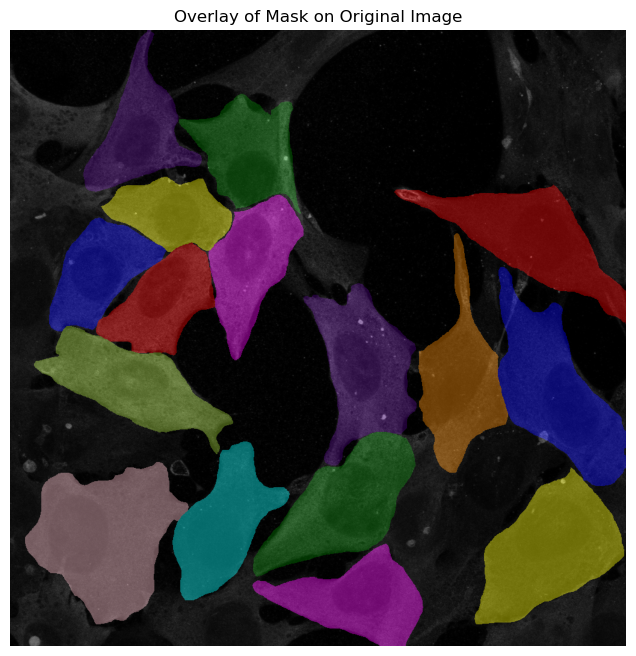

In [ ]:
image_path = '/Users/noah/Downloads/Finetune Augmentation/Training/augmented/21_img_vflip.tif'
mask_path = '/Users/noah/Downloads/Finetune Augmentation/Training/augmented/21_cp_masks_vflip.png'

image = imread(image_path)
mask = imread(mask_path)


if mask.ndim == 3: 
    mask = mask[..., 0]

if mask.max() <= 1.0:
    mask = (mask * 255).astype(np.uint8)


overlay = label2rgb(mask, image=image, bg_label=0, alpha=0.4)

plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title("Overlay of Mask on Original Image")
plt.axis("off")
plt.show()